# Clinical Measures

In [1]:
from fNeuro.behavioural.data_functions import load_data
import pingouin as pg
import seaborn as sns
import bambi as bmb
import arviz as az
import pingouin as pin
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

Read in the data and remove outlier participant

In [2]:
df = load_data('BEACON', 'neuroimaging_behavioural_measures')

df = df.drop(df[df['t2'] == 'B2010'].index)[['t2',
                                            'edeq_global_score_t2',
                                            'anxiety_t2', 
                                            'depression_t2',
                                            'bmi_t2',
                                            'age_t2',]]
df['group'] = df['t2'].apply(lambda x: 'HC' if 'B1' in x else 'AN')
df = df.drop(df[df['t2'].str.contains('B1999')].index)

Get the cronbach alpa

In [3]:
pg.cronbach_alpha(data=df[['edeq_global_score_t2', 'depression_t2', 'anxiety_t2']])

(0.7336295014220171, array([0.622, 0.816]))

plot the measure

[Text(0.5, 1.0, 'BMI scores')]

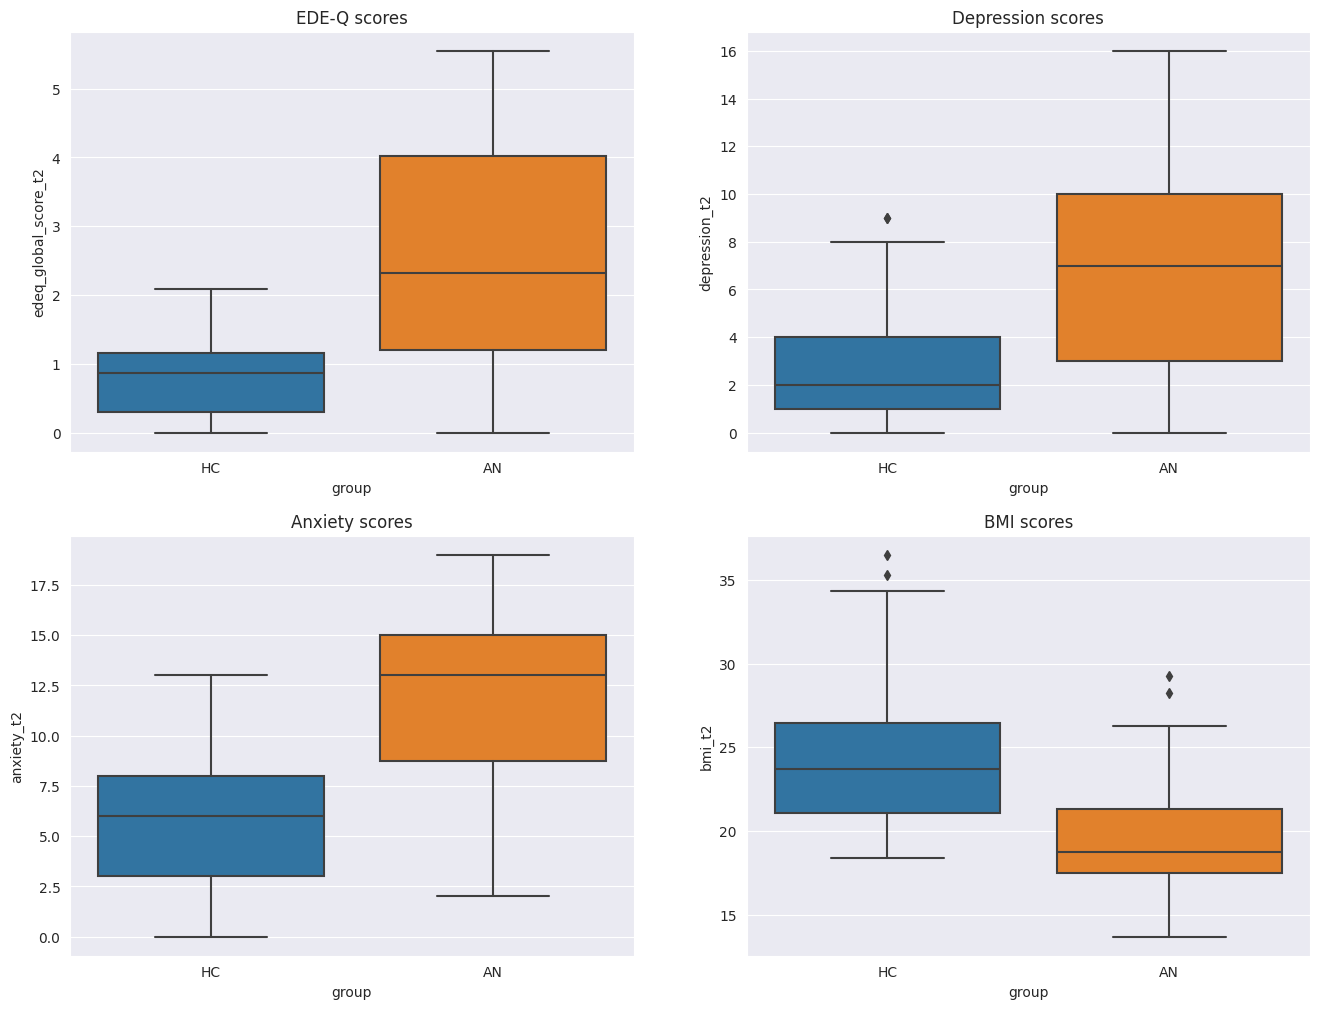

In [4]:
fig,ax = plt.subplots(2,2, figsize=(16,12))
sns.boxplot(y='edeq_global_score_t2', x='group', data=df, ax=ax[0][0]).set(title='EDE-Q scores')
sns.boxplot(y='depression_t2', x='group', data=df, ax=ax[0][1]).set(title='Depression scores')
sns.boxplot(y='anxiety_t2', x='group', data=df, ax=ax[1][0]).set(title='Anxiety scores')
sns.boxplot(y='bmi_t2', x='group', data=df, ax=ax[1][1]).set(title='BMI scores')

Get means and STD

In [5]:
groups = df.groupby('group')
groups.describe().T

group                              AN         HC
edeq_global_score_t2 count  64.000000  25.000000
                     mean    2.549219   0.866000
                     std     1.542359   0.605619
                     min     0.000000   0.000000
                     25%     1.204688   0.293750
                     50%     2.325000   0.868750
                     75%     4.025000   1.162500
                     max     5.550000   2.093750
anxiety_t2           count  64.000000  25.000000
                     mean   11.781250   6.000000
                     std     4.218135   3.253204
                     min     2.000000   0.000000
                     25%     8.750000   3.000000
                     50%    13.000000   6.000000
                     75%    15.000000   8.000000
                     max    19.000000  13.000000
depression_t2        count  64.000000  25.000000
                     mean    6.890625   2.920000
                     std     4.317249   2.900000
                     min     0.000000   0.000000
                     25%     3.000000   1.000000
                     50%     7.000000   2.000000
                     75%    10.000000   4.000000
                     max    16.000000   9.000000
bmi_t2               count  62.000000  26.000000
                     mean   19.482160  24.747140
                     std     3.303216   5.000916
                     min    13.686167  18.359375
                     25%    17.510377  21.046293
                     50%    18.714046  23.701347
                     75%    21.300444  26.466986
                     max    29.235048  36.503032
age_t2               count  65.000000  26.000000
                     mean   21.682650  22.077011
                     std     3.536103   3.075989
                     min    13.889156  17.438811
                     25%    19.368290  19.631834
                     50%    20.952792  21.045298
                     75%    24.669459  24.972195
                     max    29.089731  27.722563

In [6]:
model_ede = bmb.Model("edeq_global_score_t2 ~ group", df, dropna=True)
fitted_ede = model_ede.fit(tune=2000, draws=2000)

Automatically removing 2/91 rows from the dataset.
/home/wmda/code/BB_data/venv/lib/python3.9/site-packages/multipledispatch/dispatcher.py:27: AmbiguityWarning: 
Ambiguities exist in dispatched function _unify

The following signatures may result in ambiguous behavior:
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[ConstrainedVar, Var, Mapping], [object, ConstrainedVar, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]
	[object, ConstrainedVar, Mapping], [ConstrainedVar, object, Mapping]


Consider making the following additions:

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)

@dispatch(ConstrainedVar, ConstrainedVar, Mapping)
def _unify(...)
  warn(warning_text(dispatcher.name, ambiguities), AmbiguityWarning)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 17 seconds.


In [7]:
model_anxiety = bmb.Model("anxiety_t2 ~ group", df, dropna=True)
fitted_anxiety = model_anxiety.fit(tune=2000, draws=2000)

Automatically removing 2/91 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, group, anxiety_t2_sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 15 seconds.


In [8]:
model_depress = bmb.Model("depression_t2 ~ group", df, dropna=True)
fitted_depress = model_depress.fit(tune=2000, draws=2000)

Automatically removing 2/91 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, group, depression_t2_sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 18 seconds.


In [9]:
model_bmi = bmb.Model("bmi_t2 ~ group", df, dropna=True)
fitted_bmi = model_bmi.fit(tune=2000, draws=2000)

Automatically removing 3/91 rows from the dataset.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, group, bmi_t2_sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 13 seconds.


In [10]:
model_age = bmb.Model("age_t2 ~ group", df, dropna=True)
fitted_age = model_age.fit(tune=2000, draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, group, age_t2_sigma]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 11 seconds.


In [11]:
model_ede.graph

<bound method Model.graph of Formula: edeq_global_score_t2 ~ group
Family name: Gaussian
Link: identity
Observations: 89
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 2.0764, sigma: 4.5243)
    group ~ Normal(mu: 0, sigma: 8.5364)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.5346)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
>

In [17]:
model_anxiety.graph

<bound method Model.graph of Formula: anxiety_t2 ~ group
Family name: Gaussian
Link: identity
Observations: 89
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 10.1573, sigma: 13.8906)
    group ~ Normal(mu: 0, sigma: 26.2087)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 4.7117)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
>

In [18]:
model_depress.graph

<bound method Model.graph of Formula: depression_t2 ~ group
Family name: Gaussian
Link: identity
Observations: 89
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 5.7753, sigma: 12.7303)
    group ~ Normal(mu: 0, sigma: 24.0195)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 4.3181)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
>

In [19]:
model_bmi.graph

<bound method Model.graph of Formula: bmi_t2 ~ group
Family name: Gaussian
Link: identity
Observations: 88
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 21.0377, sigma: 13.4651)
    group ~ Normal(mu: 0, sigma: 24.7723)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 4.5209)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
>

In [20]:
model_age.graph

<bound method Model.graph of Formula: age_t2 ~ group
Family name: Gaussian
Link: identity
Observations: 91
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 21.7953, sigma: 9.9985)
    group ~ Normal(mu: 0, sigma: 18.7055)

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 3.3801)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
>

In [12]:
az.summary(fitted_ede)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,2.547,0.170,2.221,2.855,0.002,0.001,11078.0,6301.0,1.0
group[HC],-1.681,0.321,-2.263,-1.061,0.003,0.002,10904.0,5842.0,1.0
edeq_global_score_t2_sigma,1.362,0.103,1.173,1.554,0.001,0.001,11774.0,5755.0,1.0


In [13]:
az.summary(fitted_anxiety)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,11.770,0.495,10.879,12.719,0.005,0.003,12352.0,6313.0,1.0
group[HC],-5.769,0.933,-7.494,-4.011,0.008,0.006,12112.0,5886.0,1.0
anxiety_t2_sigma,4.013,0.300,3.487,4.600,0.003,0.002,11007.0,5836.0,1.0


In [14]:
az.summary(fitted_depress)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.889,0.507,5.945,7.844,0.005,0.003,11197.0,5668.0,1.0
group[HC],-3.967,0.955,-5.749,-2.176,0.009,0.007,11063.0,5972.0,1.0
depression_t2_sigma,4.016,0.305,3.459,4.593,0.003,0.002,11880.0,6246.0,1.0


In [15]:
az.summary(fitted_bmi)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,19.487,0.501,18.559,20.419,0.005,0.003,12018.0,6204.0,1.0
group[HC],5.260,0.900,3.650,7.003,0.009,0.006,11195.0,6162.0,1.0
bmi_t2_sigma,3.914,0.300,3.389,4.505,0.003,0.002,10402.0,5671.0,1.0


In [16]:
az.summary(fitted_age)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,21.686,0.423,20.867,22.461,0.004,0.003,12992.0,5905.0,1.0
group[HC],0.395,0.800,-1.081,1.922,0.007,0.008,12092.0,5915.0,1.0
age_t2_sigma,3.444,0.261,2.977,3.945,0.002,0.002,11590.0,6217.0,1.0


array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'edeq_global_score_t2_sigma'}>,
        <AxesSubplot: title={'center': 'edeq_global_score_t2_sigma'}>]],
      dtype=object)

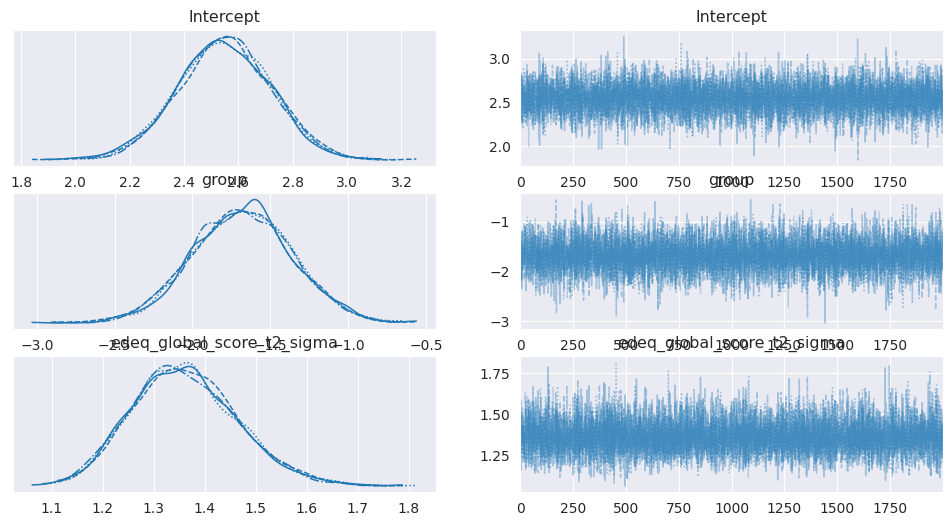

In [21]:
az.plot_trace(fitted_ede)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'anxiety_t2_sigma'}>,
        <AxesSubplot: title={'center': 'anxiety_t2_sigma'}>]],
      dtype=object)

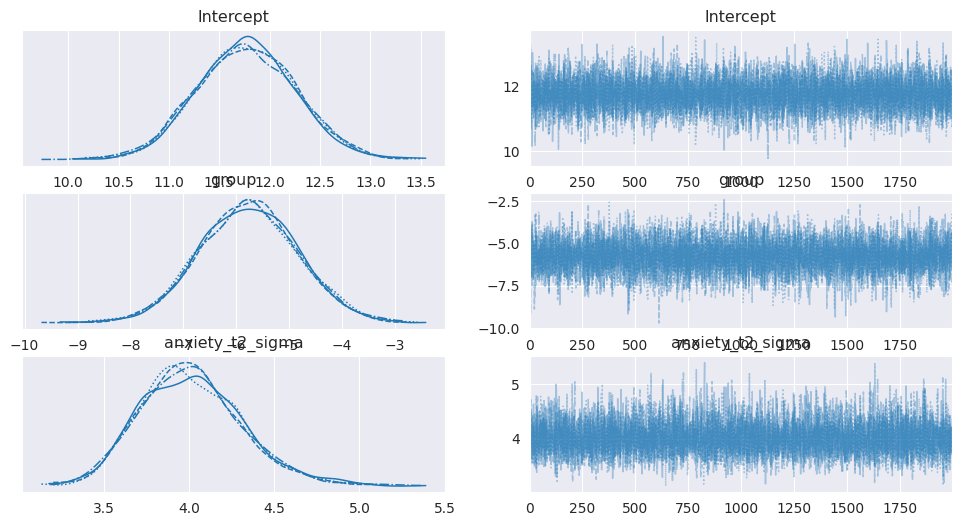

In [22]:
az.plot_trace(fitted_anxiety)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'depression_t2_sigma'}>,
        <AxesSubplot: title={'center': 'depression_t2_sigma'}>]],
      dtype=object)

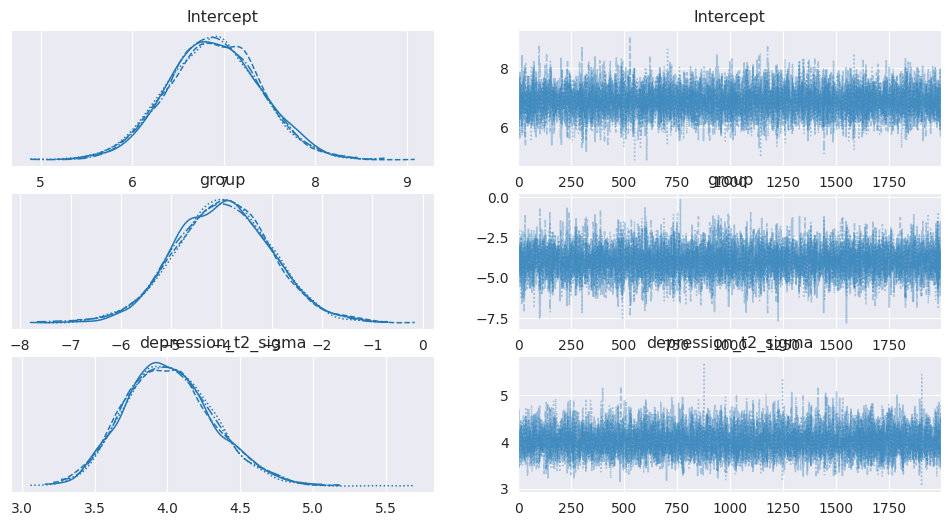

In [23]:
az.plot_trace(fitted_depress)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'bmi_t2_sigma'}>,
        <AxesSubplot: title={'center': 'bmi_t2_sigma'}>]], dtype=object)

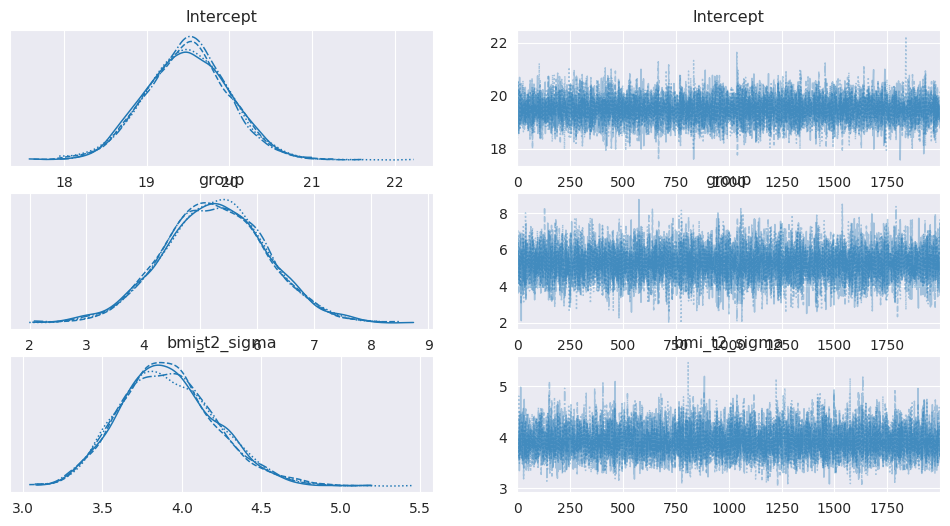

In [24]:
az.plot_trace(fitted_bmi)

array([[<AxesSubplot: title={'center': 'Intercept'}>,
        <AxesSubplot: title={'center': 'Intercept'}>],
       [<AxesSubplot: title={'center': 'group'}>,
        <AxesSubplot: title={'center': 'group'}>],
       [<AxesSubplot: title={'center': 'age_t2_sigma'}>,
        <AxesSubplot: title={'center': 'age_t2_sigma'}>]], dtype=object)

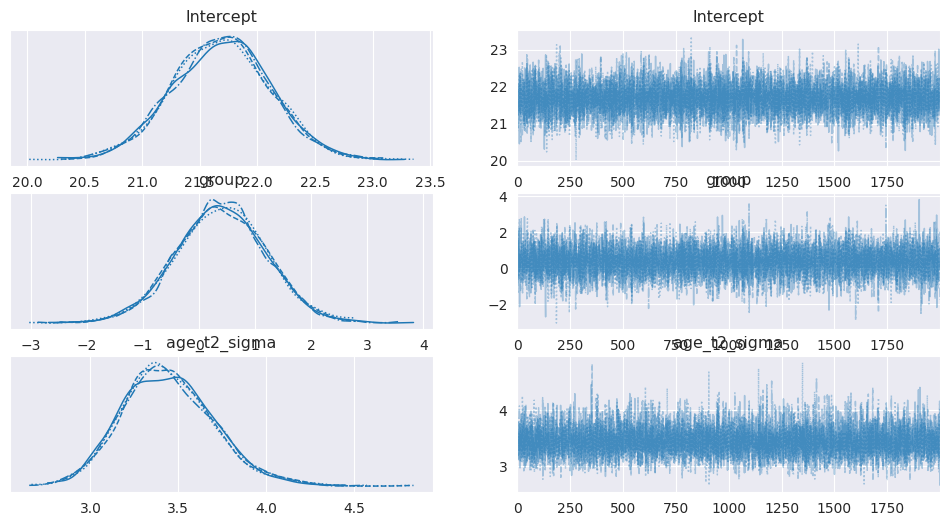

In [25]:
az.plot_trace(fitted_age)